In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns

sns.set(style="darkgrid")
sns.set(rc={"figure.figsize": (16, 8),'image.cmap': 'jet', 'lines.linewidth':.7})
colors = sns.color_palette("husl", 2)

In [13]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

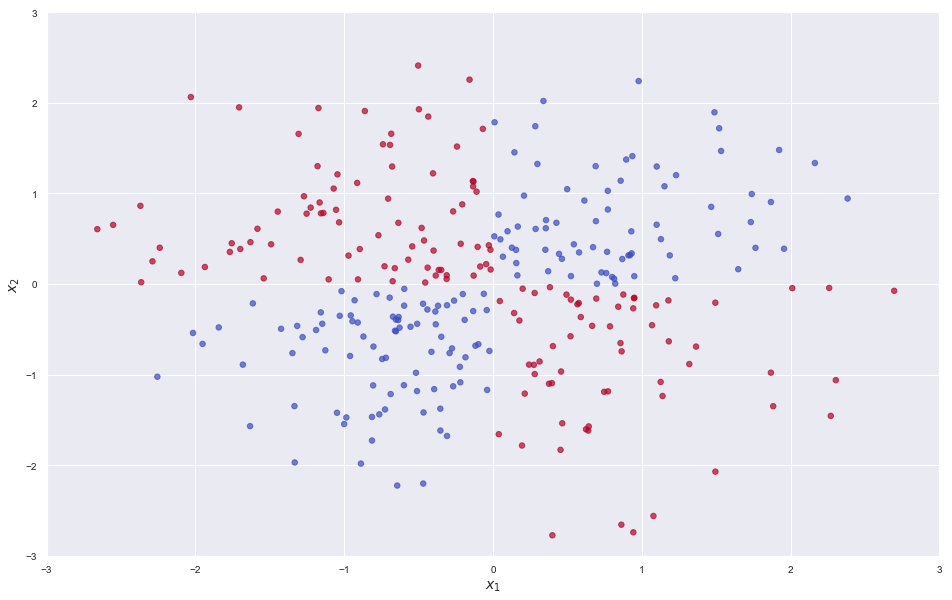

In [14]:

fig = plt.figure(figsize=(16,10))
fig.patch.set_facecolor('white')
ax = fig.gca()
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, alpha= .7, cmap=plt.cm.coolwarm)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [24]:
# fit the model
clf = svm.SVC()
#clf=svm.SVC(kernel='linear')
#clf=svm.SVC(kernel='poly', degree=7, coef0=1)
#clf=svm.SVC(kernel='sigmoid', gamma=1)
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


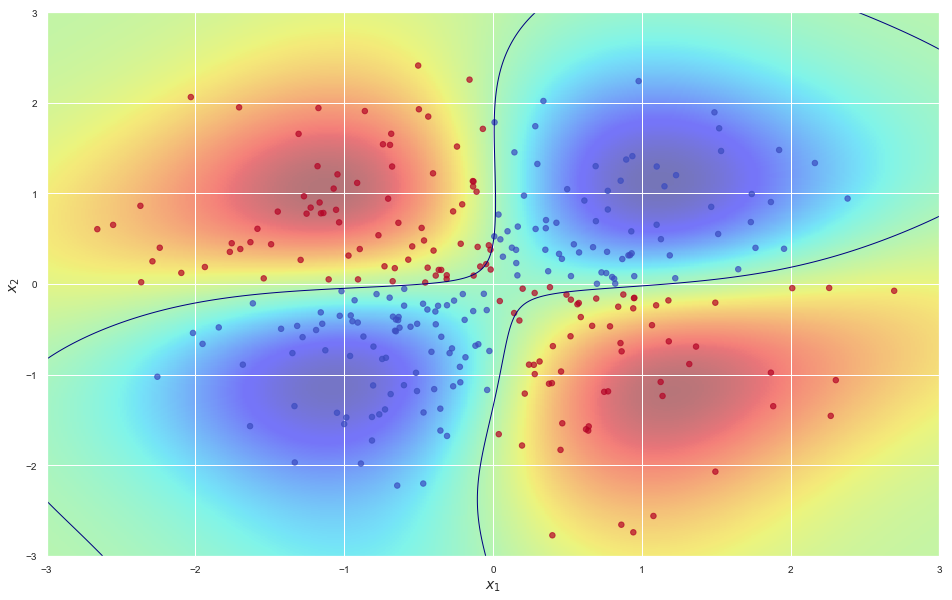

In [25]:
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
imshow_handle = plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', alpha=.5)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, alpha=.7, cmap=plt.cm.coolwarm)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()